In [27]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings 
warnings.filterwarnings("ignore")

# Imports

In [28]:
data = pd.read_csv('career_change_prediction_dataset.csv')
data.head()

Field of Study Current Occupation  Age  Gender  Years of Experience  \
0       Medicine   Business Analyst   48    Male                    7   
1      Education          Economist   44    Male                   26   
2      Education          Biologist   21  Female                   27   
3      Education   Business Analyst   33    Male                   14   
4           Arts             Doctor   28  Female                    0   

  Education Level Industry Growth Rate  Job Satisfaction  Work-Life Balance  \
0     High School                 High                 7                 10   
1        Master's                  Low                10                  3   
2        Master's                  Low                 8                  3   
3             PhD               Medium                 7                  9   
4             PhD                  Low                 3                  1   

   Job Opportunities  ...  Skills Gap  Family Influence  Mentorship Available  \
0                 83  ...           8              High                     0   
1                 55  ...           3            Medium                     0   
2                 78  ...           4               Low                     0   
3                 62  ...           2            Medium                     1   
4                  8  ...           5               Low                     0   

   Certifications Freelancing Experience  Geographic Mobility  \
0               0                      0                    1   
1               0                      1                    1   
2               0                      0                    0   
3               0                      0                    0   
4               0                      1                    0   

   Professional Networks  Career Change Events  Technology Adoption  \
0                      2                     0                    1   
1                      2                     1                    9   
2                      2                     1                    2   
3                      9                     0                    1   
4                      2                     0                    7   

   Likely to Change Occupation  
0                            0  
1                            0  
2                            0  
3                            0  
4                            1  

[5 rows x 23 columns]

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Field of Study               38444 non-null  object
 1   Current Occupation           38444 non-null  object
 2   Age                          38444 non-null  int64 
 3   Gender                       38444 non-null  object
 4   Years of Experience          38444 non-null  int64 
 5   Education Level              38444 non-null  object
 6   Industry Growth Rate         38444 non-null  object
 7   Job Satisfaction             38444 non-null  int64 
 8   Work-Life Balance            38444 non-null  int64 
 9   Job Opportunities            38444 non-null  int64 
 10  Salary                       38444 non-null  int64 
 11  Job Security                 38444 non-null  int64 
 12  Career Change Interest       38444 non-null  int64 
 13  Skills Gap                   38

#### Import relevant libraries

In [31]:
data.describe().T

count           mean           std      min  \
Age                          38444.0      39.540422     11.574509     20.0   
Years of Experience          38444.0      19.548200     11.552474      0.0   
Job Satisfaction             38444.0       5.489673      2.870407      1.0   
Work-Life Balance            38444.0       5.517012      2.879007      1.0   
Job Opportunities            38444.0      50.308267     28.877294      1.0   
Salary                       38444.0  114975.623999  48963.725598  30005.0   
Job Security                 38444.0       5.481896      2.870640      1.0   
Career Change Interest       38444.0       0.199901      0.399931      0.0   
Skills Gap                   38444.0       5.520133      2.870065      1.0   
Mentorship Available         38444.0       0.299943      0.458239      0.0   
Certifications               38444.0       0.298616      0.457657      0.0   
Freelancing Experience       38444.0       0.149204      0.356294      0.0   
Geographic Mobility          38444.0       0.303975      0.459978      0.0   
Professional Networks        38444.0       5.514098      2.868188      1.0   
Career Change Events         38444.0       1.003304      0.815953      0.0   
Technology Adoption          38444.0       5.487904      2.857247      1.0   
Likely to Change Occupation  38444.0       0.576553      0.494111      0.0   

                                 25%       50%       75%       max  
Age                             30.0      40.0      50.0      59.0  
Years of Experience             10.0      20.0      30.0      39.0  
Job Satisfaction                 3.0       6.0       8.0      10.0  
Work-Life Balance                3.0       6.0       8.0      10.0  
Job Opportunities               25.0      50.0      75.0     100.0  
Salary                       72701.5  114861.0  157241.0  199996.0  
Job Security                     3.0       5.0       8.0      10.0  
Career Change Interest           0.0       0.0       0.0       1.0  
Skills Gap                       3.0       6.0       8.0      10.0  
Mentorship Available             0.0       0.0       1.0       1.0  
Certifications                   0.0       0.0       1.0       1.0  
Freelancing Experience           0.0       0.0       0.0       1.0  
Geographic Mobility              0.0       0.0       1.0       1.0  
Professional Networks            3.0       6.0       8.0      10.0  
Career Change Events             0.0       1.0       2.0       2.0  
Technology Adoption              3.0       5.0       8.0      10.0  
Likely to Change Occupation      0.0       1.0       1.0       1.0

In [32]:
data.isnull().sum()

Field of Study                    0
Current Occupation                0
Age                               0
Gender                            0
Years of Experience               0
Education Level                   0
Industry Growth Rate              0
Job Satisfaction                  0
Work-Life Balance                 0
Job Opportunities                 0
Salary                            0
Job Security                      0
Career Change Interest            0
Skills Gap                        0
Family Influence               9632
Mentorship Available              0
Certifications                    0
Freelancing Experience            0
Geographic Mobility               0
Professional Networks             0
Career Change Events              0
Technology Adoption               0
Likely to Change Occupation       0
dtype: int64

In [33]:
data.value_counts()

Field of Study    Current Occupation   Age  Gender  Years of Experience  Education Level  Industry Growth Rate  Job Satisfaction  Work-Life Balance  Job Opportunities  Salary  Job Security  Career Change Interest  Skills Gap  Family Influence  Mentorship Available  Certifications  Freelancing Experience  Geographic Mobility  Professional Networks  Career Change Events  Technology Adoption  Likely to Change Occupation
Arts              Artist               20   Female  0                    Master's         High                  1                 1                  54                 96673   8             0                       3           Medium            0                     1               0                       0                    5                      2                     8                    1                              1
Law               Mechanical Engineer  50   Male    22                   Bachelor's       High                  10                10                 72  

In [35]:
X = data[['Salary']]
y = data['Likely to Change Occupation']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[   0 3212]
 [   0 4477]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3212
           1       0.58      1.00      0.74      4477

    accuracy                           0.58      7689
   macro avg       0.29      0.50      0.37      7689
weighted avg       0.34      0.58      0.43      7689



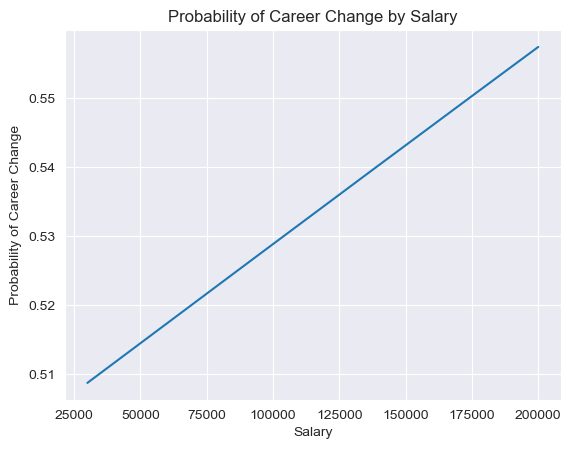

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Step 1: Train logistic regression on Salary only
X_salary = data[['Salary']]
y = data['Likely to Change Occupation']

log_model_salary = LogisticRegression(max_iter=1000)
log_model_salary.fit(X_salary, y)

# Step 2: Create salary range
salary_range = np.linspace(data['Salary'].min(), data['Salary'].max(), 500).reshape(-1, 1)

# Step 3: Predict probabilities
probs = log_model_salary.predict_proba(salary_range)[:, 1]

# Step 4: Plot
plt.plot(salary_range, probs)
plt.title('Probability of Career Change by Salary')
plt.xlabel('Salary')
plt.ylabel('Probability of Career Change')
plt.grid(True)
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[1545 1667]
 [1697 2780]]
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      3212
           1       0.63      0.62      0.62      4477

    accuracy                           0.56      7689
   macro avg       0.55      0.55      0.55      7689
weighted avg       0.56      0.56      0.56      7689



ייתכן שהקשר בין שכר לשינוי עיסוק לא חזק לבד –

שלב 1: ניתוח קשר חזותי בין Salary ל־Likely to Change Occupation

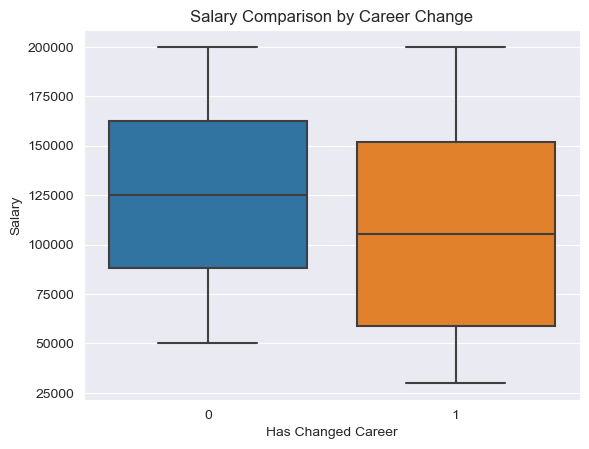

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x='Likely to Change Occupation', y='Salary')
plt.title('Salary Comparison by Career Change')
plt.xlabel('Has Changed Career')
plt.ylabel('Salary')
plt.show()


In [14]:
data[['Salary', 'Likely to Change Occupation']].corr()


Salary  Likely to Change Occupation
Salary                       1.000000                    -0.177951
Likely to Change Occupation -0.177951                     1.000000